## **BOOMBIKES CASE STUDY**
**PROBLEM STATEMENT**: The objective is to analyze the factors on which the demand for these shared bikes depends and the demand for these bikes among the people after this ongoing quarantine situation ends.


In [1]:
# Importing python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [2]:
# Importing the dataset
bike = pd.read_csv('/content/day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#CLEANING OF DATA

In [3]:
# Dropping casual and registered as, cnt has the sum of casual & registered both
# Can also drop dteday, as yr and month might help us with some seasonality
# Dropping instant as it just a record and has no relation with other variables.
bike.drop(['casual', 'registered', 'dteday','instant'], axis=1, inplace=True)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [4]:
"""Converting the categorical variables from a num format - season (1:spring, 2:summer, 3:fall, 4:winter)
   weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
"""
bike['season'] = bike['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
bike['weathersit'] = bike['weathersit'].map({1: 'Clear', 2: 'Mist', 3: 'Light Rain', 4: 'Heavy Rain'})
bike.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [5]:
bike.isnull().sum()

,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0
atemp,0
hum,0


In [6]:
# No nulls are found, hence the data looks consistent
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 68.6+ KB


In [7]:
bike.describe()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,6.526027,0.028767,2.997260,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,3.450215,0.167266,2.006161,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,1.000000,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,4.000000,0.000000,1.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,7.000000,0.000000,3.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,10.000000,0.000000,5.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,12.000000,1.000000,6.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


#UNDERSTANDING CORRELATION BETWEEN VARIABLES

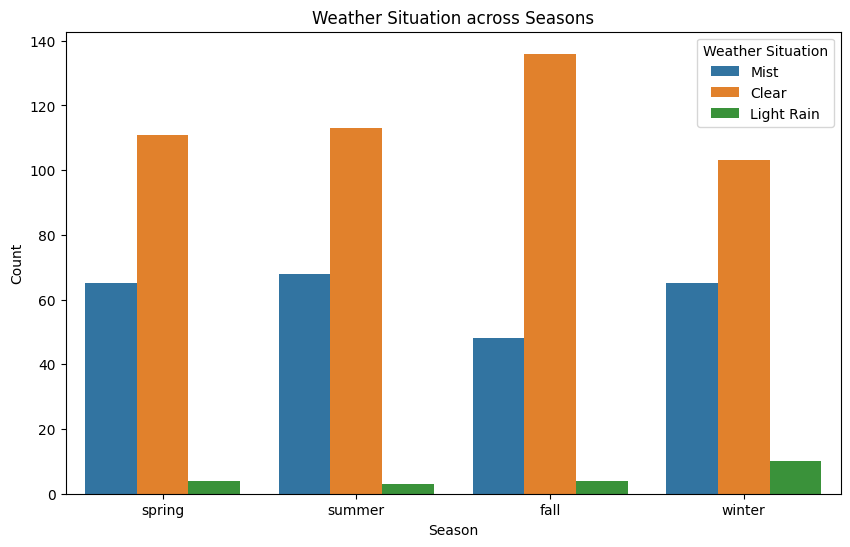

In [8]:
# The weather is clear most of the seasons except winter where there is more Rain. Misty weather is almost the same across seasons.
# High chances are less bike riders during winter season.
plt.figure(figsize=(10, 6))
sns.countplot(x='season', hue='weathersit', data=bike)
plt.title('Weather Situation across Seasons')
plt.xlabel('Season')
plt.ylabel('Count')
plt.legend(title='Weather Situation', loc='upper right')
plt.show()

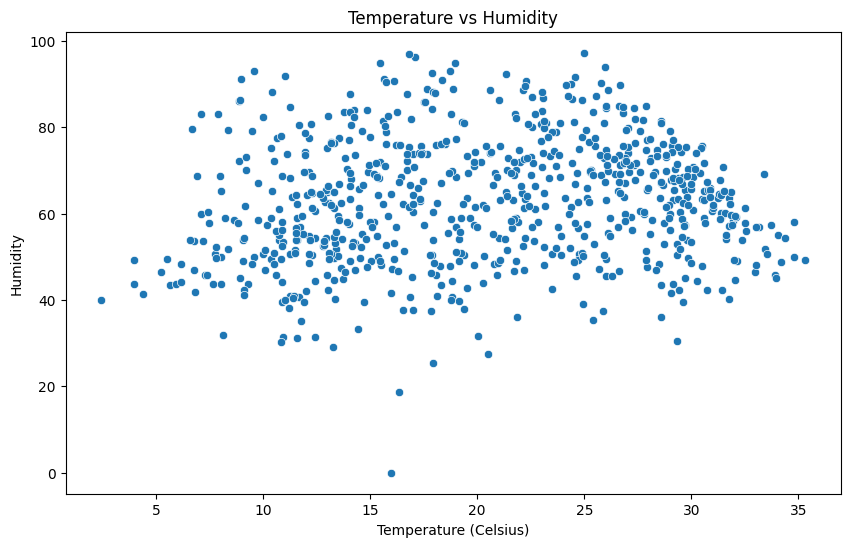

In [9]:
# Where temp is high, humidity is also high. Chances could be less bike riders during high temps.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='hum', data=bike)
plt.title('Temperature vs Humidity')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Humidity')
plt.show()

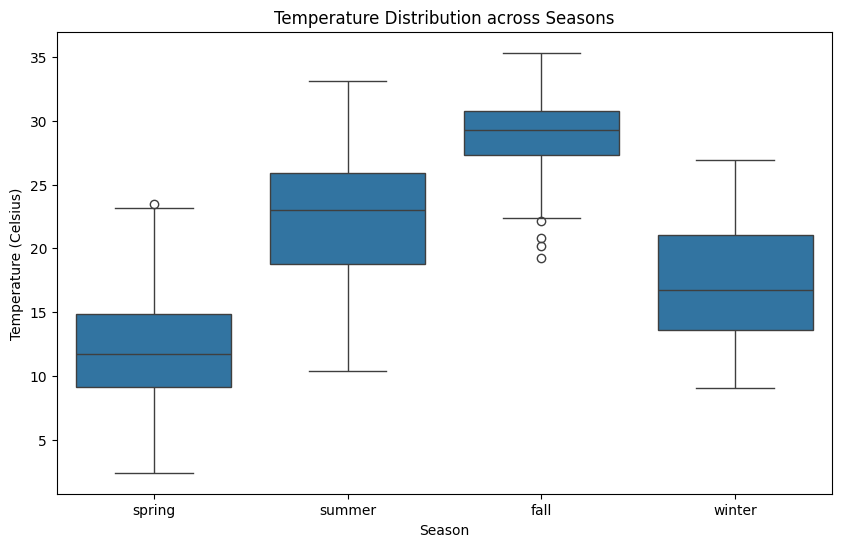

In [10]:
# chances of higher number of bike rides must be for a spring stroll as well.
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='temp', data=bike)
plt.title('Temperature Distribution across Seasons')
plt.xlabel('Season')
plt.ylabel('Temperature (Celsius)')
plt.show()

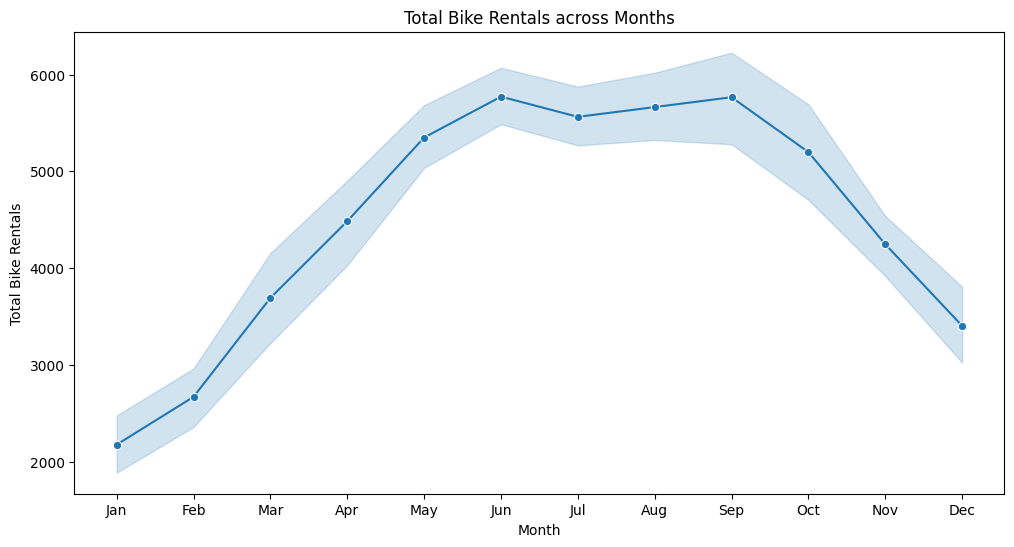

In [11]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='mnth', y='cnt', data=bike, marker='o')
plt.title('Total Bike Rentals across Months')
plt.xlabel('Month')
plt.ylabel('Total Bike Rentals')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

In [12]:
""" From the above chart we can definetly conclude our above points -
1. There is a dip in the bike riders during the winter months starting from Sept to Jan.
2. The number of bikers increase from the spring season and a very less dip during Fall.
"""

' From the above chart we can definetly conclude our above points - \n1. There is a dip in the bike riders during the winter months starting from Sept to Jan. \n2. The number of bikers increase from the spring season and a very less dip during Fall.\n'

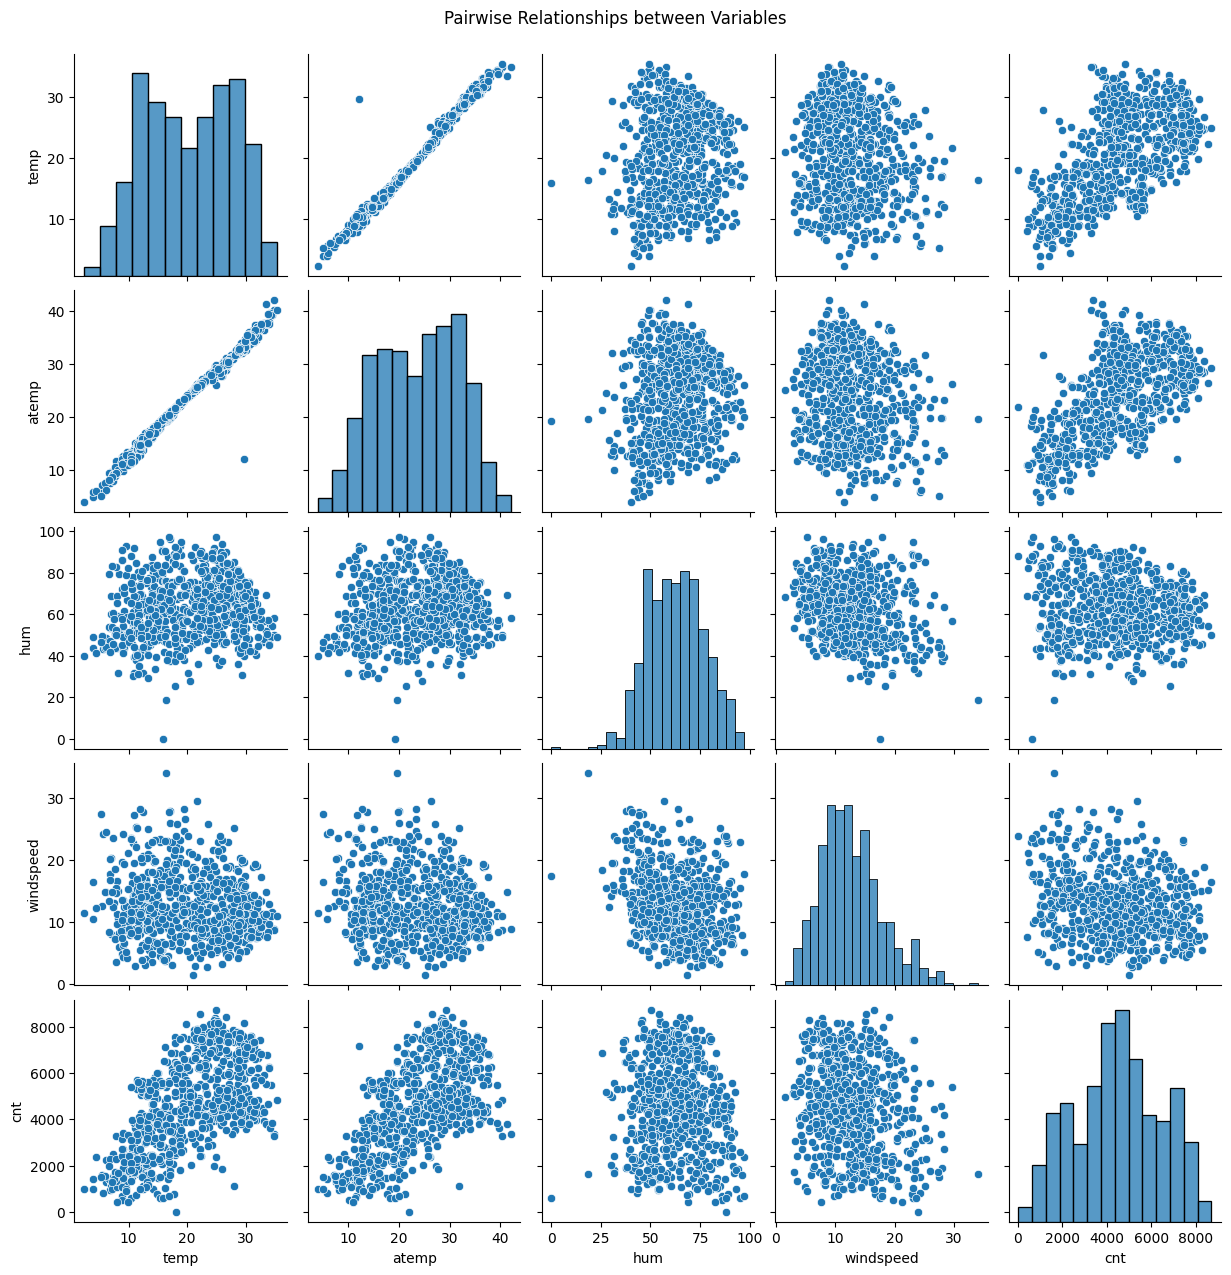

In [13]:
sns.pairplot(bike[['temp', 'atemp', 'hum', 'windspeed', 'cnt']])
plt.suptitle('Pairwise Relationships between Variables', y=1.02)
plt.show()

# DERIVING A VARIABLE
**temp_dif** - The difference between actual and perceived temperature might influence people's decision to rent bikes. A higher difference could indicate discomfort, potentially reducing bike rentals.

**day_type** - Different types of days (holidays, working days, weekends) can have a significant impact on bike rental patterns. This derived variable helps you quickly segment the data and perform more specific analyses.

In [14]:
bike['temp_diff'] = bike['temp'] - bike['atemp']

In [15]:

def categorize_day(row):
    if row['holiday'] == 1:
        return 'Holiday'
    elif row['workingday'] == 1:
        return 'Working Day'
    else:
        return 'Weekend'

bike['day_type'] = bike.apply(categorize_day, axis=1)

In [16]:
# Since day_type will categorize 2 columns into one, it will be easier to create a dummy variable with two columns
bike.drop(['holiday','workingday'],axis=1,inplace=True)

# CREATING DUMMY VARIABLES FOR CATEGORICAL VARIABLES


In [17]:
df_bikes = pd.get_dummies(bike, columns=['season', 'day_type', 'weathersit'],drop_first=True)


# Convert any boolean columns to 1s and 0s, if necessary
df_bikes = df_bikes.astype(int)

# Display the dataframe with the new dummy variables
print(df_bikes.head())

   yr  mnth  weekday  temp  atemp  hum  windspeed   cnt  temp_diff  \
0   0     1        6    14     18   80         10   985         -4   
1   0     1        0    14     17   69         16   801         -2   
2   0     1        1     8      9   43         16  1349         -1   
3   0     1        2     8     10   59         10  1562         -2   
4   0     1        3     9     11   43         12  1600         -2   

   season_spring  season_summer  season_winter  day_type_Weekend  \
0              1              0              0                 1   
1              1              0              0                 1   
2              1              0              0                 0   
3              1              0              0                 0   
4              1              0              0                 0   

   day_type_Working Day  weathersit_Light Rain  weathersit_Mist  
0                     0                      0                1  
1                     0               

In [18]:
df_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   yr                     730 non-null    int64
 1   mnth                   730 non-null    int64
 2   weekday                730 non-null    int64
 3   temp                   730 non-null    int64
 4   atemp                  730 non-null    int64
 5   hum                    730 non-null    int64
 6   windspeed              730 non-null    int64
 7   cnt                    730 non-null    int64
 8   temp_diff              730 non-null    int64
 9   season_spring          730 non-null    int64
 10  season_summer          730 non-null    int64
 11  season_winter          730 non-null    int64
 12  day_type_Weekend       730 non-null    int64
 13  day_type_Working Day   730 non-null    int64
 14  weathersit_Light Rain  730 non-null    int64
 15  weathersit_Mist        730 non-null    i

In [19]:
df_bikes.columns

Index(['yr', 'mnth', 'weekday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt',
       'temp_diff', 'season_spring', 'season_summer', 'season_winter',
       'day_type_Weekend', 'day_type_Working Day', 'weathersit_Light Rain',
       'weathersit_Mist'],
      dtype='object')

# FEATURE SCALING ALL THE VARIABLES


In [20]:
# Dropping the Target Variable - cnt
X = df_bikes.drop('cnt', axis=1)
y = df_bikes['cnt']

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_var =['temp', 'atemp', 'hum', 'windspeed', 'temp_diff']
X[num_var] = scaler.fit_transform(X[num_var])
X.head()

,yr,mnth,weekday,temp,atemp,hum,windspeed,temp_diff,season_spring,season_summer,season_winter,day_type_Weekend,day_type_Working Day,weathersit_Light Rain,weathersit_Mist
0,0,1,6,0.363636,0.384615,0.824742,0.272727,0.125000,1,0,0,1,0,0,1
1,0,1,0,0.363636,0.358974,0.711340,0.454545,0.208333,1,0,0,1,0,0,1
2,0,1,1,0.181818,0.153846,0.443299,0.454545,0.250000,1,0,0,0,1,0,0
3,0,1,2,0.181818,0.179487,0.608247,0.272727,0.208333,1,0,0,0,1,0,0
4,0,1,3,0.212121,0.205128,0.443299,0.333333,0.208333,1,0,0,0,1,0,0


# RESIDUAL ANALYSIS

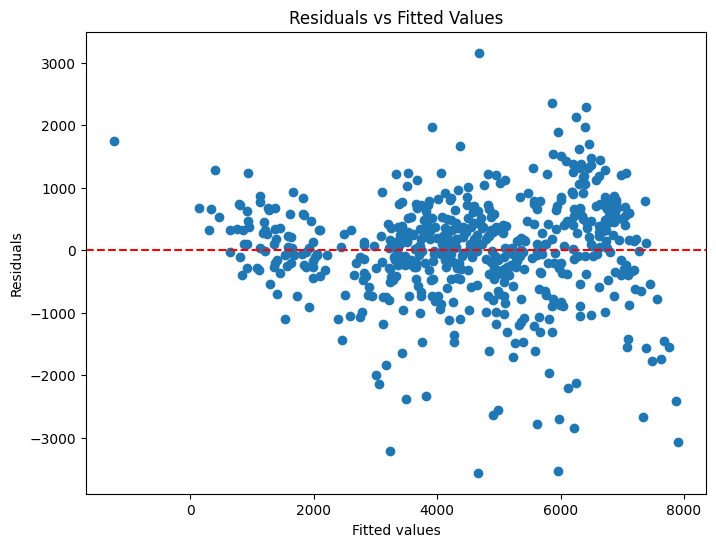

In [33]:
residuals = model_new.resid

# Plot 1: Residuals vs Fitted (Predicted) Values to check linearity and homoscedasticity
plt.figure(figsize=(8, 6))
plt.scatter(model_new.fittedvalues, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

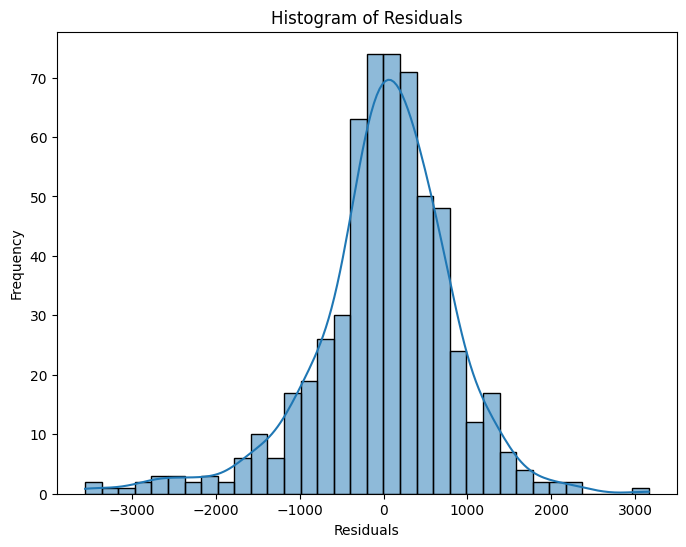

In [34]:
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


The residuals have a mean of zero which means that they are normally distributed.

# TRAINING THE MODEL

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [24]:
# Predictions
y_pred = lm.predict(X_test)

# R-squared score
r2 = r2_score(y_test, y_pred)
print(f'R-squared score: {r2}')

R-squared score: 0.8523062664673766


R-squared value of 0.85 indicates that 85% of the variance in the target variable (cnt, the total bike rentals) can be explained by the features included in the model. This suggests a strong linear relationship between the predictors and the target variable, meaning the model fits the data well.

In [25]:
import statsmodels.api as sm

# Adding a constant (intercept) to the model
X = sm.add_constant(X_train)
model = sm.OLS(y_train, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     173.0
Date:                Wed, 04 Sep 2024   Prob (F-statistic):          2.27e-200
Time:                        10:53:45   Log-Likelihood:                -4752.4
No. Observations:                 584   AIC:                             9537.
Df Residuals:                     568   BIC:                             9607.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1842.20

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                  feature         VIF
0                   const  345.215884
1                      yr    1.038097
2                    mnth    3.779446
3                 weekday    1.021844
4                    temp  244.087991
5                   atemp  276.243321
6                     hum    1.906393
7               windspeed    1.247853
8               temp_diff    4.617229
9           season_spring    5.842246
10          season_summer    2.529961
11          season_winter    3.599211
12       day_type_Weekend    7.243169
13   day_type_Working Day    7.317987
14  weathersit_Light Rain    1.337878
15        weathersit_Mist    1.597050


## FEATURE SELECTION

Now Based on above p-values and VIF we will check the significance and multi-collinearity of independant variables respectively, I can drop a few variables and then calculate the R^2.

In [27]:
# Where p-value is greater than 0.05, we will drop those variables - month, temp, atemp, temp_diff, season_summer
# Recreate the feature set without the non-significant variables
X_new = X_train.drop(columns=['mnth', 'temp', 'atemp', 'temp_diff', 'season_summer'])

# Add a constant for the intercept
X_new = sm.add_constant(X_new)

# Refit the model
model_new = sm.OLS(y_train, X_new).fit()
print(model_new.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     171.5
Date:                Wed, 04 Sep 2024   Prob (F-statistic):          4.94e-165
Time:                        10:53:45   Log-Likelihood:                -4849.5
No. Observations:                 584   AIC:                             9721.
Df Residuals:                     573   BIC:                             9769.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  4461.88

After removing certain less significant fields using p-value, the R^2 reduces to 0.75%. Which is still a decent value explaining the features but not better than the prev model.

In [28]:
# Check the correlation between temp and atemp
correlation = np.corrcoef(X['temp'], X['atemp'])[0, 1]
print(f"Correlation between temp and atemp: {correlation}")

# Assuming 'atemp' is highly correlated and should be removed
X_new_vif = X.drop(columns=['atemp'])

# Refit the model
model_new_vif = sm.OLS(y_train, X_new).fit()
print(model_new_vif.summary())

# Its better to remove atemp
vif_data_new = pd.DataFrame()
vif_data_new["feature"] = X_new_vif.columns
vif_data_new["VIF"] = [variance_inflation_factor(X_new_vif.values, i) for i in range(X_new_vif.shape[1])]

print(vif_data_new)

Correlation between temp and atemp: 0.9951092564795635
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     171.5
Date:                Wed, 04 Sep 2024   Prob (F-statistic):          4.94e-165
Time:                        10:53:46   Log-Likelihood:                -4849.5
No. Observations:                 584   AIC:                             9721.
Df Residuals:                     573   BIC:                             9769.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

***Lets create a final model where we remove atemp as it has High p-value and high VIF.***

In [29]:
X_pval = X_train.drop(columns=['temp'])

# Add a constant for the intercept
X_pval = sm.add_constant(X_pval)

# Refit the model
model_new = sm.OLS(y_train, X_pval).fit()
print(model_new.summary())

X_pval_new = pd.DataFrame()
X_pval_new["feature"] = X_pval.columns
X_pval_new["VIF"] = [variance_inflation_factor(X_new_vif.values, i) for i in range(X_new_vif.shape[1])]

print(X_pval_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     185.5
Date:                Wed, 04 Sep 2024   Prob (F-statistic):          2.03e-201
Time:                        10:53:46   Log-Likelihood:                -4752.6
No. Observations:                 584   AIC:                             9535.
Df Residuals:                     569   BIC:                             9601.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1608.34

***Lastly dropping p-values greater than 0.05 - mnth, temp_diff and VIF 7 of two highly collinear variables - hence droping one - day_type_Weekend***

In [30]:
X_pval = X_pval.drop(columns=['mnth', 'temp_diff','day_type_Weekend'])

# Refit the model
model_new = sm.OLS(y_train, X_pval).fit()
print(model_new.summary())

# Recalculate VIF to check for multicollinearity
X_pval_new = pd.DataFrame()
X_pval_new["feature"] = X_pval.columns
X_pval_new["VIF"] = [variance_inflation_factor(X_pval.values, i) for i in range(X_pval.shape[1])]

print(X_pval_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     232.9
Date:                Wed, 04 Sep 2024   Prob (F-statistic):          4.77e-203
Time:                        10:53:46   Log-Likelihood:                -4757.1
No. Observations:                 584   AIC:                             9538.
Df Residuals:                     572   BIC:                             9591.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2208.77

#FINAL THOUGHTS -
## Technical Aspect -
1. The above model so far looks the best one of all, with no higher p-values which means all the rest of the variables are pretty significant.
2. The VIF of all variables is also less than equal to 5, which suggests no multicollinearity.
3. After feature selection, 0.81 R-squared value shows that, the best fit line explains the features perfectly.

## Assumptions while dropping a few variables -
1. temp_diff, temp - Reason behind keeping atemp is because a lot of people decide to take a bike ride based on their intuition of whether the weather will be good/bad. (basically to track customer decision pattern)

## Business Aspect
1. Weather-driven Marketing: Adjust marketing efforts based on weather forecasts. Promote bike rentals more aggressively on days when the "feels-like" temperature is comfortable, and offer weather-related promotions during uncomfortable weather conditions (e.g., rain, mist, strong winds).
2. Seasonal Campaigns: Address the drop in demand during spring by launching targeted campaigns to overcome weather-related hesitations. Promote summer and winter biking with special offers, particularly on working days.
3. Commuting Strategies: Focus on targeting regular commuters during working days and weekdays. Create subscription or loyalty programs tailored for daily users, especially those commuting to work.
